Trilha 4: Tarefa (Peso 3)
Empregue no mínimo duas bases de dados (tabelas) extraídas de um ou ambos os sites abaixo: 

 

a. https://wid.world/ ; 

b. https://www.gapminder.org/  

 

E faça uma Exploração dos Dados EDA de seu interesse, empregando o Python e o que você aprendeu até aqui. Os sites apresentam diversos dados sobre as diferenças de desenvolvimento dos países e a desigualdade. Foque em perguntas que são do seu interesse sobre os dados. 

Na sua análise você deve responder ao menos quatro perguntas relevantes sobre os dados, incluir na sua análise seleções e visualizações dos dados e um texto de conclusão a cada pergunta. 

Peça ao professor modelos de código para sua implementação. 

Seu código deve ser minimamente claro e organizado. Não são necessários comentários detalhados, mas deixe claro no seu código cada parte (atividade), cada fase realizada e a resposta final com sua conclusão. 

 

Entrega:  

.pdf de print do seu notebook Python. 

Compartilhe o endereço do seu notebook Python (Google Drive ou GitHub) 100% executável para abertura no Google Colab.  

Não deixe de incluir o seu texto uma introdução justificando a escolha da análise e ao final suas conclusões. 

Perguntas:



1.   Em que período o índice de Gini melhorou no Brasil?
2.   Como o Brasil se posiciona no índice de Gini em relação aos países desenvolvidos?
3. Em que período houve mais dados sobre a pobreza no Brasil?
4. Como a pobreza urbana e rural do Brasil se modificaram com o tempo?

In [ ]:
# Importando Bibliotecas e adicionando seus respectivos alias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [ ]:
#Importando os df: Gini, Rural, Urban
# Fonte: https://www.gapminder.org/data

dfGini = pd.read_csv('https://raw.githubusercontent.com/rodglins/Python/master/desafios/exploracaoDados/gini.csv')
dfRural = pd.read_csv('https://raw.githubusercontent.com/rodglins/Python/master/desafios/exploracaoDados/rural.csv')
dfUrban = pd.read_csv('https://raw.githubusercontent.com/rodglins/Python/master/desafios/exploracaoDados/urban.csv')


In [ ]:
# verificando o formato do df
dfGini.head()


,country,1966,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,31.7,NaN,NaN,30.6,NaN,NaN,30.0,NaN,NaN,NaN,29.0,NaN,34.6,32.9,33.7,33.2,NaN,NaN
2,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.5,NaN,NaN,NaN,NaN,26.0,NaN
3,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.8,NaN,NaN,NaN,NaN,NaN,42.8,45.3,NaN,NaN,NaN,46.8,45.5,44.9,45.9,48.9,49.5,49.1,50.7,49.8,51.1,53.3,53.8,50.9,48.4,47.7,46.3,46.2,44.9,43.7,43.6,42.6,41.3,40.9,41.6,NaN,42.0,41.1,41.3,42.9
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.2,NaN,35.4,34.8,33.0,37.5,36.0,29.7,31.2,29.2,28.0,30.0,29.4,29.6,30.6,31.5,32.4,32.5,33.6,34.4,29.9


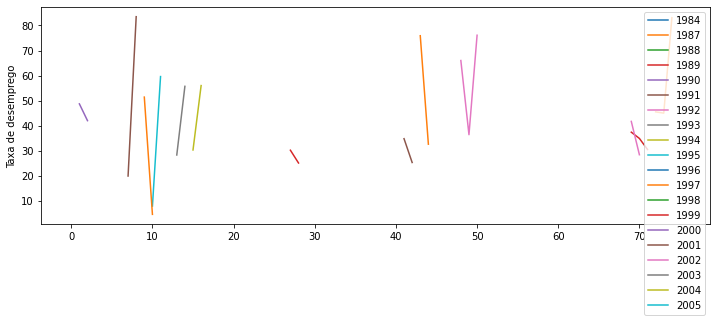

In [ ]:
# tentando usar o df atual sem tratamento

plt.figure(figsize=(12,4))

plt.plot(dfRural.iloc[:, 1:53]) # considerando as colunas 1 a 53
plt.ylabel("Taxa de desemprego")

plt.legend(dfRural.columns[1:53]) # nomes das colunas 1 a 53
plt.show()

In [ ]:
# reshape / não funcionou

dfGiniTeste = pd.read_csv('https://raw.githubusercontent.com/rodglins/Python/master/desafios/exploracaoDados/gini.csv')

dfGiniTeste = pd.pivot(dfGiniTeste,columns=['country'],values='country',index='country').reset.index()
dfGiniTeste = dfGiniTeste.rename_axis('',axis='columns')
dfGiniTeste.head()

ValueError: ignored

In [ ]:
# tratando os dados, transferindo dados de ano de colunas para linhas, e seus respectivos valores
dfGini = pd.melt(dfGini.reset_index(), id_vars=['country','index'], var_name='ano', value_name='valor').sort_values(['country','valor'], ascending=False)
dfGini.head()

,country,index,ano,valor
8683,Zimbabwe,166,2018,50.3
8349,Zimbabwe,166,2016,44.3
7347,Zimbabwe,166,2010,43.2
166,Zimbabwe,166,1966,NaN
333,Zimbabwe,166,1968,NaN


([<matplotlib.axis.XTick at 0x7f0e3c62cfd0>,
 [Text(0, 0, 'Brasil'), Text(0, 0, 'Mundo')])

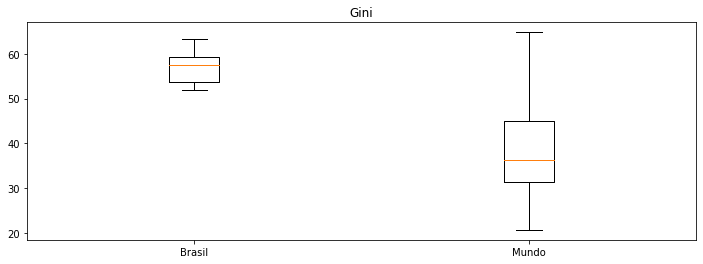

In [ ]:
# comparando dados Gini Brasil x Mundo, com gráfico boxplot 

dfGini_not_null = dfGini[ ~ np.isnan( dfGini.valor )]

plt.figure(figsize=(12,4))
plt.boxplot(dfGini_not_null[dfGini_not_null.country == 'Brazil'].valor,positions=[1],showfliers=False)
plt.boxplot(dfGini_not_null.valor,positions=[2],showfliers=False)
plt.title('Gini')
plt.xticks(ticks=[1,2], labels=['Brasil','Mundo'])

In [ ]:
# transformando campo ano para o formato data

dfGini.ano = pd.to_datetime(dfGini.ano, format='%Y',errors='coerce')
display(dfGini.dtypes)

country            object
index               int64
ano        datetime64[ns]
valor             float64
dtype: object

In [ ]:
# resetando o index

dfGini = dfGini.reset_index()
dfGini.head()

,level_0,country,index,ano,valor
0,8683,Zimbabwe,166,2018-01-01,50.3
1,8349,Zimbabwe,166,2016-01-01,44.3
2,7347,Zimbabwe,166,2010-01-01,43.2
3,166,Zimbabwe,166,1966-01-01,NaN
4,333,Zimbabwe,166,1968-01-01,NaN


In [ ]:
# Este não funcionou:
# plt.plot(dfGini_not_null["ano"],dfGini_not_null["valor"],label="Valor")
# # plt.plot(data2["dfGini"],data2["Despesas em segurança"],label="Despesas em segurança")
# plt.legend()
# plt.show()

# Este não funcionou:
# plt.figure(figsize=(12,5))
# plt.subplot(1,2,1)
# plt.plot(dfGini["ano"],dfGini["valor"],label="Taxa de latrocínio",marker="o", markersize=4)
# plt.ylabel("Taxa de latrocínio por 100 hab")
# plt.show()

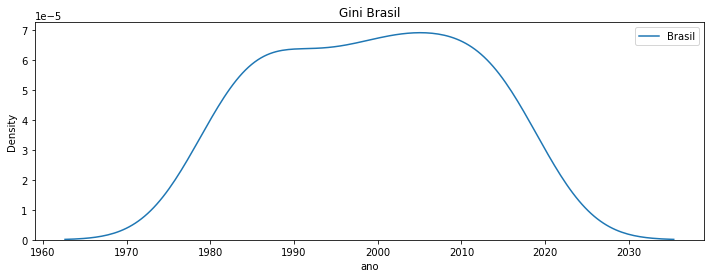

In [ ]:
# Mostra a densidade dos dados conforme o período:

plt.figure(figsize=(12,4))
sns.kdeplot(dfGini_not_null[dfGini_not_null.country == 'Brazil'].ano,label='Brasil')
# sns.kdeplot(dfGini_not_null.ano,label='Mundo')
plt.title('Gini Brasil')
plt.legend()
plt.show()

# Houve mais dados entre 2005 e 2015


In [ ]:
# tratando valores vazios

dfGini2 = dfGini_not_null.sort_values(['country', 'ano'])

In [ ]:
dfGini2.head()

,level_0,country,index,ano,valor
8640,4677,Albania,1,1995-01-01,27.0
8636,5679,Albania,1,2001-01-01,31.7
8637,6180,Albania,1,2004-01-01,30.6
8638,6681,Albania,1,2007-01-01,30.0
8639,7349,Albania,1,2011-01-01,29.0


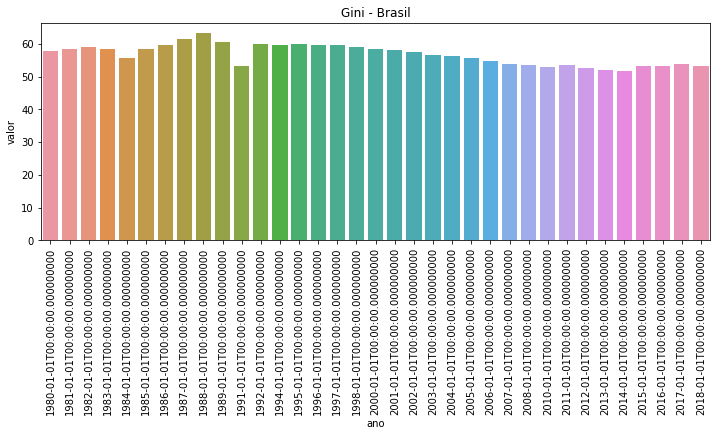

In [ ]:
# Verificando a variação do Gini entre 1980 e 2018:
# É possível observar uma piora entre 1980 e 1988, melhora entre 1988 e 1991, piora em 1992 e uma melhora entre 1993 e 2014.
# A melhora de 20 anos é interrompida e tem início de piora em 2015.

plt.figure(figsize=(12,4))
sns.barplot(x=dfGini2[dfGini2.country == 'Brazil'].ano, y=dfGini2[dfGini2.country == 'Brazil'].valor)
plt.title('Gini - Brasil')
# plt.hlines(dfGini2.valor.mean(),-0.5,7.5,color='r', linestyles=':')
# plt.text(0, dfGini2.valor.mean()+1,'Média de valor')
plt.xticks(rotation=90)
plt.show()

### **Concatenando Dataframes**



*   DfRural + dfUrban



In [ ]:
# Unificando os df
# Recupera os dados de ambos os df

df_concat = pd.concat([dfRural, dfUrban])
print("Concat DataFrame:")
df_concat.head()

Concat DataFrame:


,country,1984,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.6,NaN,NaN,NaN,NaN
1,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.8,NaN,48.7,NaN,NaN,NaN,NaN,NaN
2,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN
3,Burundi,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Benin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.2,NaN,NaN,NaN,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# verificando os dados

display(df_concat.shape)
display(df_concat.head())
display(df_concat.tail())


(151, 21)

,country,1984,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.6,NaN,NaN,NaN,NaN
1,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.8,NaN,48.7,NaN,NaN,NaN,NaN,NaN
2,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN
3,Burundi,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Benin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.2,NaN,NaN,NaN,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,country,1984,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
70,Uzbekistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.5,NaN,NaN,NaN,NaN,NaN,NaN
71,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.2,NaN,NaN,NaN,6.6,NaN,NaN,NaN,NaN
72,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,NaN,NaN,NaN,NaN,NaN,53.0,NaN,NaN
74,Zimbabwe,NaN,NaN,NaN,NaN,3.4,NaN,NaN,NaN,NaN,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Jordan             2
Azerbaijan         2
Armenia            2
Ecuador            2
Guatemala          2
                  ..
Latvia             1
North Macedonia    1
Ukraine            1
Uruguay            1
Guinea-Bissau      1
Name: country, Length: 79, dtype: int64

72

'Albania'

'Zimbabwe'

In [ ]:
# convertendo colunas em linhas

df_concat = pd.melt(df_concat.reset_index(), id_vars=['country','index'], var_name='ano', value_name='valor').sort_values(['country','valor'], ascending=False)

In [ ]:
df_concat.head()

,country,index,ano,valor
1434,Zimbabwe,75,1995,48.0
679,Zimbabwe,75,1990,35.8
1509,Zimbabwe,74,1995,7.9
754,Zimbabwe,74,1990,3.4
75,Zimbabwe,75,1984,NaN


In [ ]:
# verificando valores vazios: 
display(df_concat.ano.duplicated().sum())

# verificando valores mínimo e máximo
display(df_concat.ano.min(),df_concat.ano.max())

3000

'1984'

'2005'

In [ ]:
# verificando o índice

df_concat.index

RangeIndex(start=0, stop=3020, step=1)

In [ ]:
# resetando o índice
df_concat = df_concat.reset_index()
df_concat.head()

,level_0,country,index,ano,valor
0,1434,Zimbabwe,75,1995,48.0
1,679,Zimbabwe,75,1990,35.8
2,1509,Zimbabwe,74,1995,7.9
3,754,Zimbabwe,74,1990,3.4
4,75,Zimbabwe,75,1984,NaN


In [ ]:
df_concat.head()

,level_0,country,index,ano,valor
0,1434,Zimbabwe,75,1995,48.0
1,679,Zimbabwe,75,1990,35.8
2,1509,Zimbabwe,74,1995,7.9
3,754,Zimbabwe,74,1990,3.4
4,75,Zimbabwe,75,1984,NaN


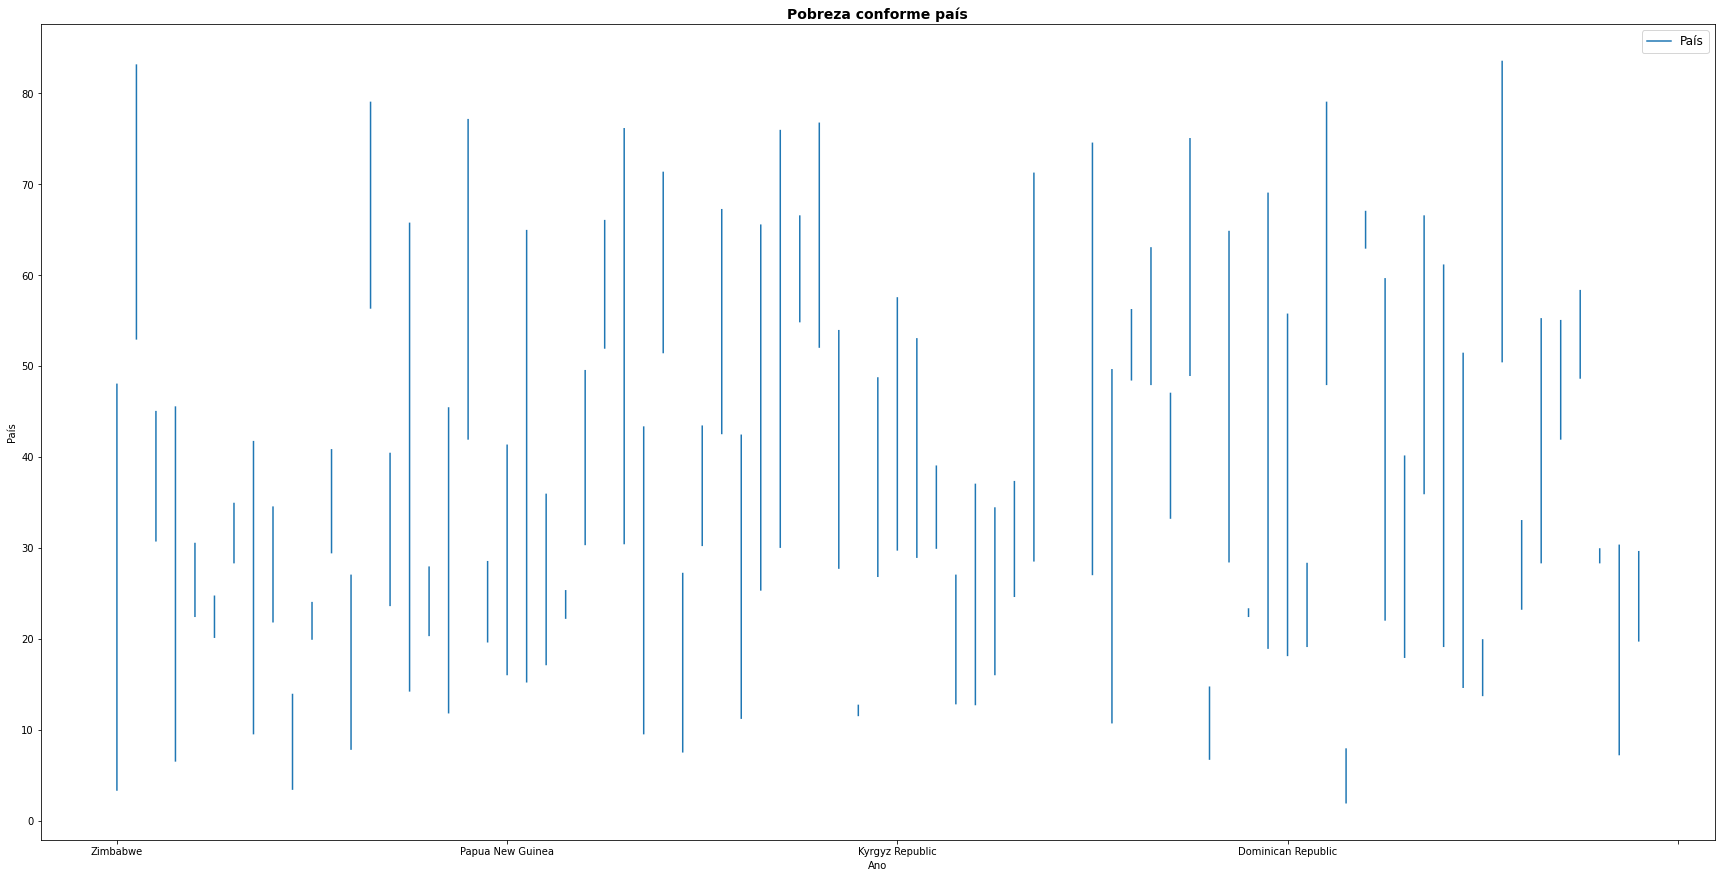

In [ ]:
# tentando elaborar gráfico mas não funcionou. Ele possui dados duplicados de cenário rural e urbano. 

fig, ax = plt.subplots(figsize=(30,15))
ax.plot(df_concat.country, df_concat.valor, label='País')

ax.set_title('Pobreza conforme país', fontsize=14, weight='bold')
ax.set_xlabel("Ano")
ax.set_ylabel("País")

# z=np.polyfit(df_concat.index,df_concat.index, 1)
# z = np.polyfit(df_concat.ano.dt.year,df_concat.ano,1)
p = np.poly1d(z)
#ax.plot(df_concat.index,p(df_concat.index), linestyle='dashed', label='Linear(x)', linewidth=2, color='k')
# ax.plot(df_concat.ano,p(df_concat.ano.dt.year), linestyle='dashed', label='Linear(x)', linewidth=2, color='k')

ax.legend(fontsize=12)
import matplotlib.ticker as ticker

ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
#ax.set_xticklabels(df_concat.ano)
plt.show()


In [ ]:
# verificando se os dados estão corretos
display(df_concat.dtypes)


level_0      int64
country     object
index        int64
ano         object
valor      float64
dtype: object

In [ ]:
# tratando a coluna ano
df_concat.ano = pd.to_datetime(df_concat.ano, format='%Y',errors='coerce')
display(df_concat.dtypes)

level_0             int64
country            object
index               int64
ano        datetime64[ns]
valor             float64
dtype: object

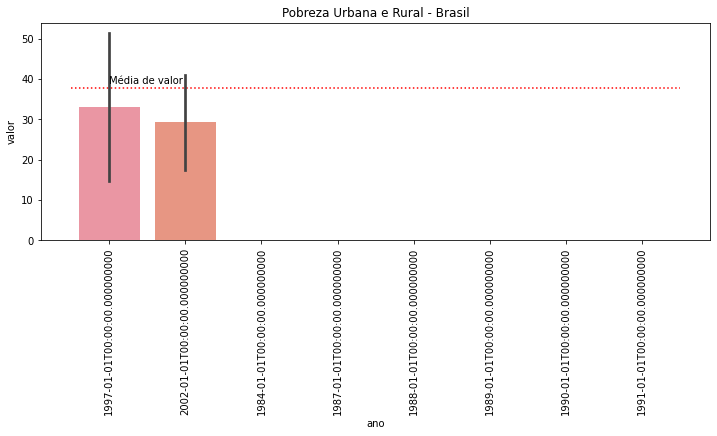

In [ ]:
# Gerando gráfico de barras Pobreza no Brasil. 
# É possível observar queda na pobreza entre 1997 e 2002. Há poucos dados para maiores observações. 

plt.figure(figsize=(12,4))
sns.barplot(x=df_concat[df_concat.country == 'Brazil'].ano, y=df_concat[df_concat.country == 'Brazil'].valor)
plt.title('Pobreza Urbana e Rural - Brasil')
plt.hlines(df_concat.valor.mean(),-0.5,7.5,color='r', linestyles=':')
plt.text(0, df_concat.valor.mean()+1,'Média de valor')
plt.xticks(rotation=90)
plt.show()

### **Tratando dados Dataframe Rural**

In [ ]:
# Convertendo dados de colunas para linhas

dfRural2 = pd.melt(dfRural.reset_index(), id_vars=['country','index'], var_name='ano', value_name='valor').sort_values(['country','valor'], ascending=False)
dfRural2.head()

,country,index,ano,valor
759,Zimbabwe,75,1995,48.0
379,Zimbabwe,75,1990,35.8
75,Zimbabwe,75,1984,NaN
151,Zimbabwe,75,1987,NaN
227,Zimbabwe,75,1988,NaN


In [ ]:
# Convertendo campo ano

dfRural2.ano = pd.to_datetime(dfRural2.ano, format='%Y',errors='coerce')
display(dfRural2.dtypes)

country            object
index               int64
ano        datetime64[ns]
valor             float64
dtype: object

([<matplotlib.axis.XTick at 0x7f0e3c029990>,
 [Text(0, 0, 'Brasil'), Text(0, 0, 'Mundo')])

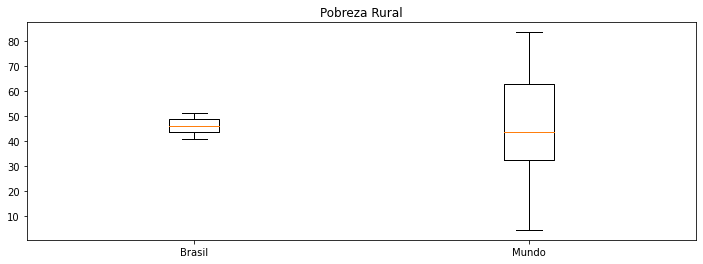

In [ ]:
# Gerando gráfico de Pobreza Rural
# Como o gráfico boxplot é possível observar que a média da pobreza rural no Brasil está acima da média mundial de pobreza.

dfRural3 = dfRural2.sort_values(['country', 'ano'])
dfRural4 = dfRural3[ ~ np.isnan( dfRural3.valor )]

plt.figure(figsize=(12,4))
plt.boxplot(dfRural4[dfRural4.country == 'Brazil'].valor,positions=[1],showfliers=False)
plt.boxplot(dfRural4.valor,positions=[2],showfliers=False)
plt.title('Pobreza Rural')
plt.xticks(ticks=[1,2], labels=['Brasil','Mundo'])

Text(0.5, 1.0, 'Pobreza Rural - Brasil')

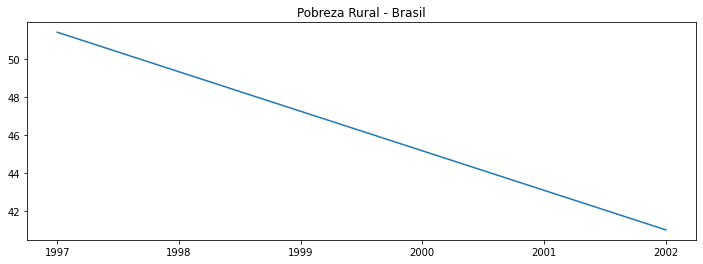

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(dfRural4[dfRural4.country == 'Brazil'].ano, dfRural4[dfRural4.country == 'Brazil'].valor)
plt.title('Pobreza Rural - Brasil')

# Gráfico mostra uma situação de queda mas não apresenta os dados de forma correta

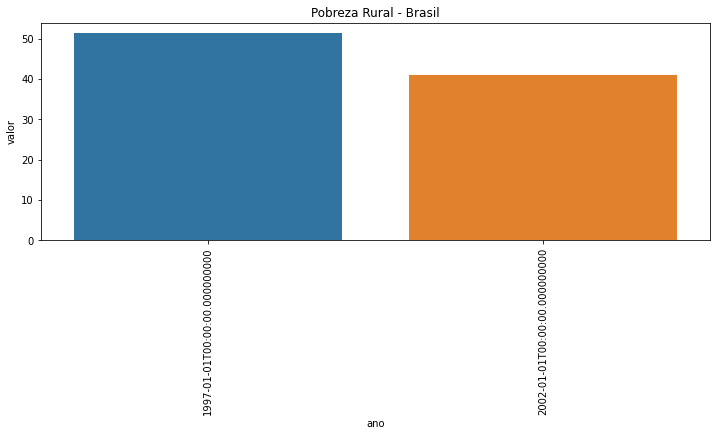

In [ ]:
# Gerando gráfico de barras Pobreza Rural no Brasil. Aprensenta dados claros. 
# Permite inferir situação de queda mas o dataframe não possui dados suficientes dos demais anos.

plt.figure(figsize=(12,4))
sns.barplot(x=dfRural4[dfRural4.country == 'Brazil'].ano, y=dfRural4[dfRural4.country == 'Brazil'].valor)
plt.title('Pobreza Rural - Brasil')
# plt.hlines(dfRural4.valor.mean(),-0.5,7.5,color='r', linestyles=':')
# plt.text(0, dfRural4.valor.mean()+1,'Média de valor')
plt.xticks(rotation=90)
plt.show()

In [ ]:
dfRural4.head()

,country,index,ano,valor
1140,Albania,0,2001-01-01,29.6
91,Algeria,15,1987-01-01,16.6
623,Algeria,15,1994-01-01,30.3
913,Armenia,1,1998-01-01,50.8
1065,Armenia,1,2000-01-01,48.7


### **Tratando dados Dataframe Urbano**

In [ ]:
# Convertendo campos de Ano para linhas

dfUrban2 = pd.melt(dfUrban.reset_index(), id_vars=['country','index'], var_name='ano', value_name='valor').sort_values(['country','valor'], ascending=False)

In [ ]:
#Tratando o formato data

dfUrban2.ano = pd.to_datetime(dfUrban2.ano, format='%Y',errors='coerce')

In [ ]:
# Criando um df sem valores vazios 

dfUrban3 = dfUrban2[ ~ np.isnan( dfUrban2.valor )]

In [ ]:
# Ordenando a tabela por País e depois por Ano.
dfUrban4 = dfUrban3.sort_values(['country', 'ano'])

([<matplotlib.axis.XTick at 0x7f0e3c617150>,
 [Text(0, 0, 'Brasil'), Text(0, 0, 'Mundo')])

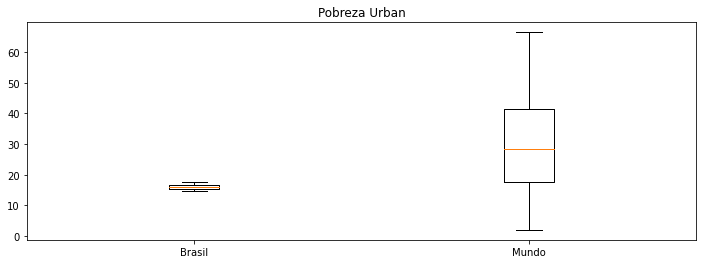

In [ ]:
# Gráfico boxplot Pobreza Urbana Brasil e no Mundo
# Podemos observar que a pobreza urbana no Brasil é menor que a média mundial.

plt.figure(figsize=(12,4))
plt.boxplot(dfUrban4[dfUrban4.country == 'Brazil'].valor,positions=[1],showfliers=False)
plt.boxplot(dfUrban4.valor,positions=[2],showfliers=False)
plt.title('Pobreza Urban')
plt.xticks(ticks=[1,2], labels=['Brasil','Mundo'])

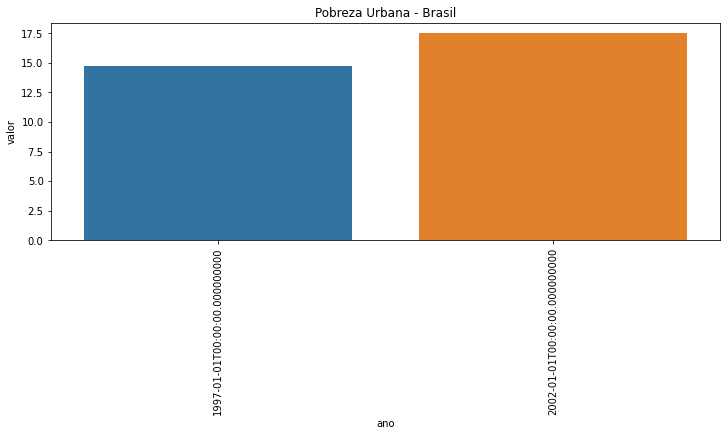

In [ ]:
# Gráfico de barras Pobreza Urbana no Brasil
# É possível observar o aumento da pobreza urbana no Brasil entre 1997 e 2002.

plt.figure(figsize=(12,4))
sns.barplot(x=dfUrban4[dfUrban4.country == 'Brazil'].ano, y=dfUrban4[dfUrban4.country == 'Brazil'].valor)
plt.title('Pobreza Urbana - Brasil')
plt.xticks(rotation=90)
plt.show()

### **Realizando a comparação**

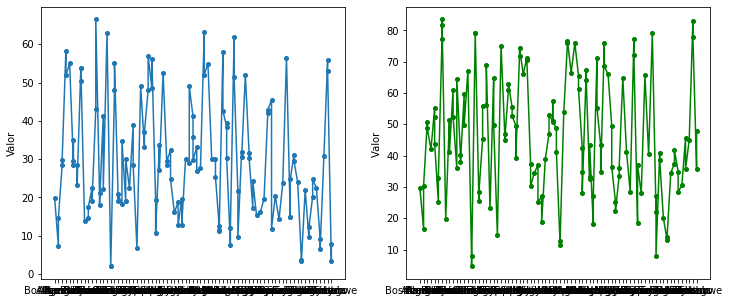

In [ ]:
# Grafico de linha comparativo entre Pobreza Rural e Urbana no mundo
# Gráfico com formato incorreto, não funcionou
# Não é possível fazer inferências com esse gráfico.

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(dfUrban4["country"],dfUrban4["valor"],label="Ano",marker="o", markersize=4)
plt.ylabel("Valor")

plt.subplot(1,2,2)
plt.plot(dfRural4["country"],dfRural4["valor"],label="Ano",color="green",marker="o", markersize=4)
plt.ylabel("Valor ")

plt.show()

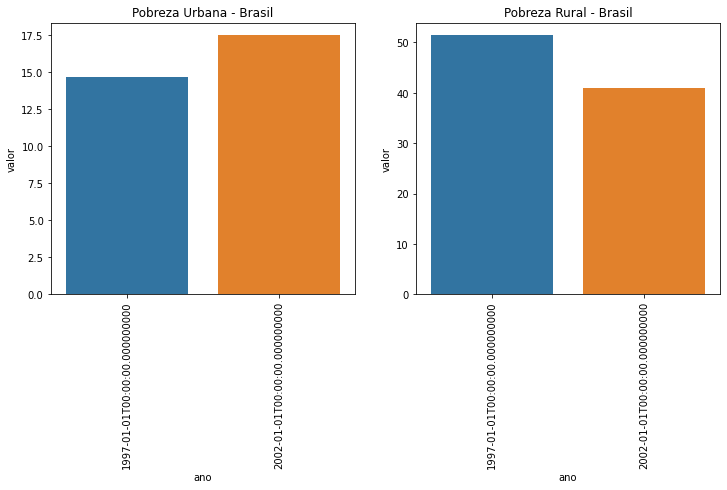

In [ ]:
# Gráfico comparativo entre pobreza urbana x pobreza rural no Brasil
# É possivel obsevar aumento da pobreza urbana e redução da pobreza rural no Brasil. Pelo campo valor é possivel observar que a pobreza rural é muito maior.

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(x=dfUrban4[dfUrban4.country == 'Brazil'].ano, y=dfUrban4[dfUrban4.country == 'Brazil'].valor)
plt.title('Pobreza Urbana - Brasil')
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.barplot(x=dfRural4[dfRural4.country == 'Brazil'].ano, y=dfRural4[dfRural4.country == 'Brazil'].valor)
plt.title('Pobreza Rural - Brasil')
plt.xticks(rotation=90)

plt.show()

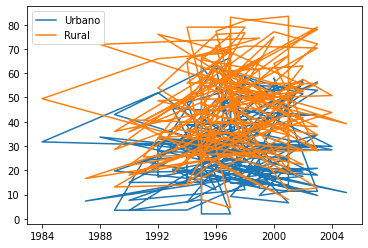

In [ ]:
# outro erro em gerar o gráfico:

plt.plot(dfUrban4["ano"],dfUrban4["valor"],label="Urbano")
plt.plot(dfRural4["ano"],dfRural4["valor"],label="Rural")

plt.legend()
plt.show()

In [ ]:
# coluna com a data por trimestre (quarter) usando a função "date_range" de Pandas
pd.date_range(start='1/1/1980', periods=8*21, freq='Q')

DatetimeIndex(['1980-03-31', '1980-06-30', '1980-09-30', '1980-12-31',
               '1981-03-31', '1981-06-30', '1981-09-30', '1981-12-31',
               '1982-03-31', '1982-06-30',
               ...
               '2019-09-30', '2019-12-31', '2020-03-31', '2020-06-30',
               '2020-09-30', '2020-12-31', '2021-03-31', '2021-06-30',
               '2021-09-30', '2021-12-31'],
              dtype='datetime64[ns]', length=168, freq='Q-DEC')

ValueError: ignored

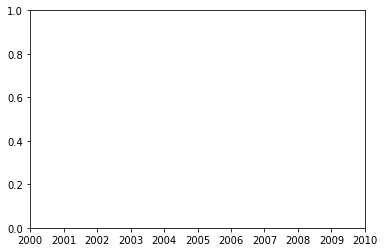

In [ ]:
# Usar a variável "Quarter" no eixo x (o gráfico não funcionou)
Quarter=pd.date_range(start='1/1/1980', periods=8*21, freq='Q')

plt.plot(Quarter,dfUrban4['valor'])
plt.ylabel("Pobreza Urbana")
plt.title("Urbana- Brasil")
plt.show()

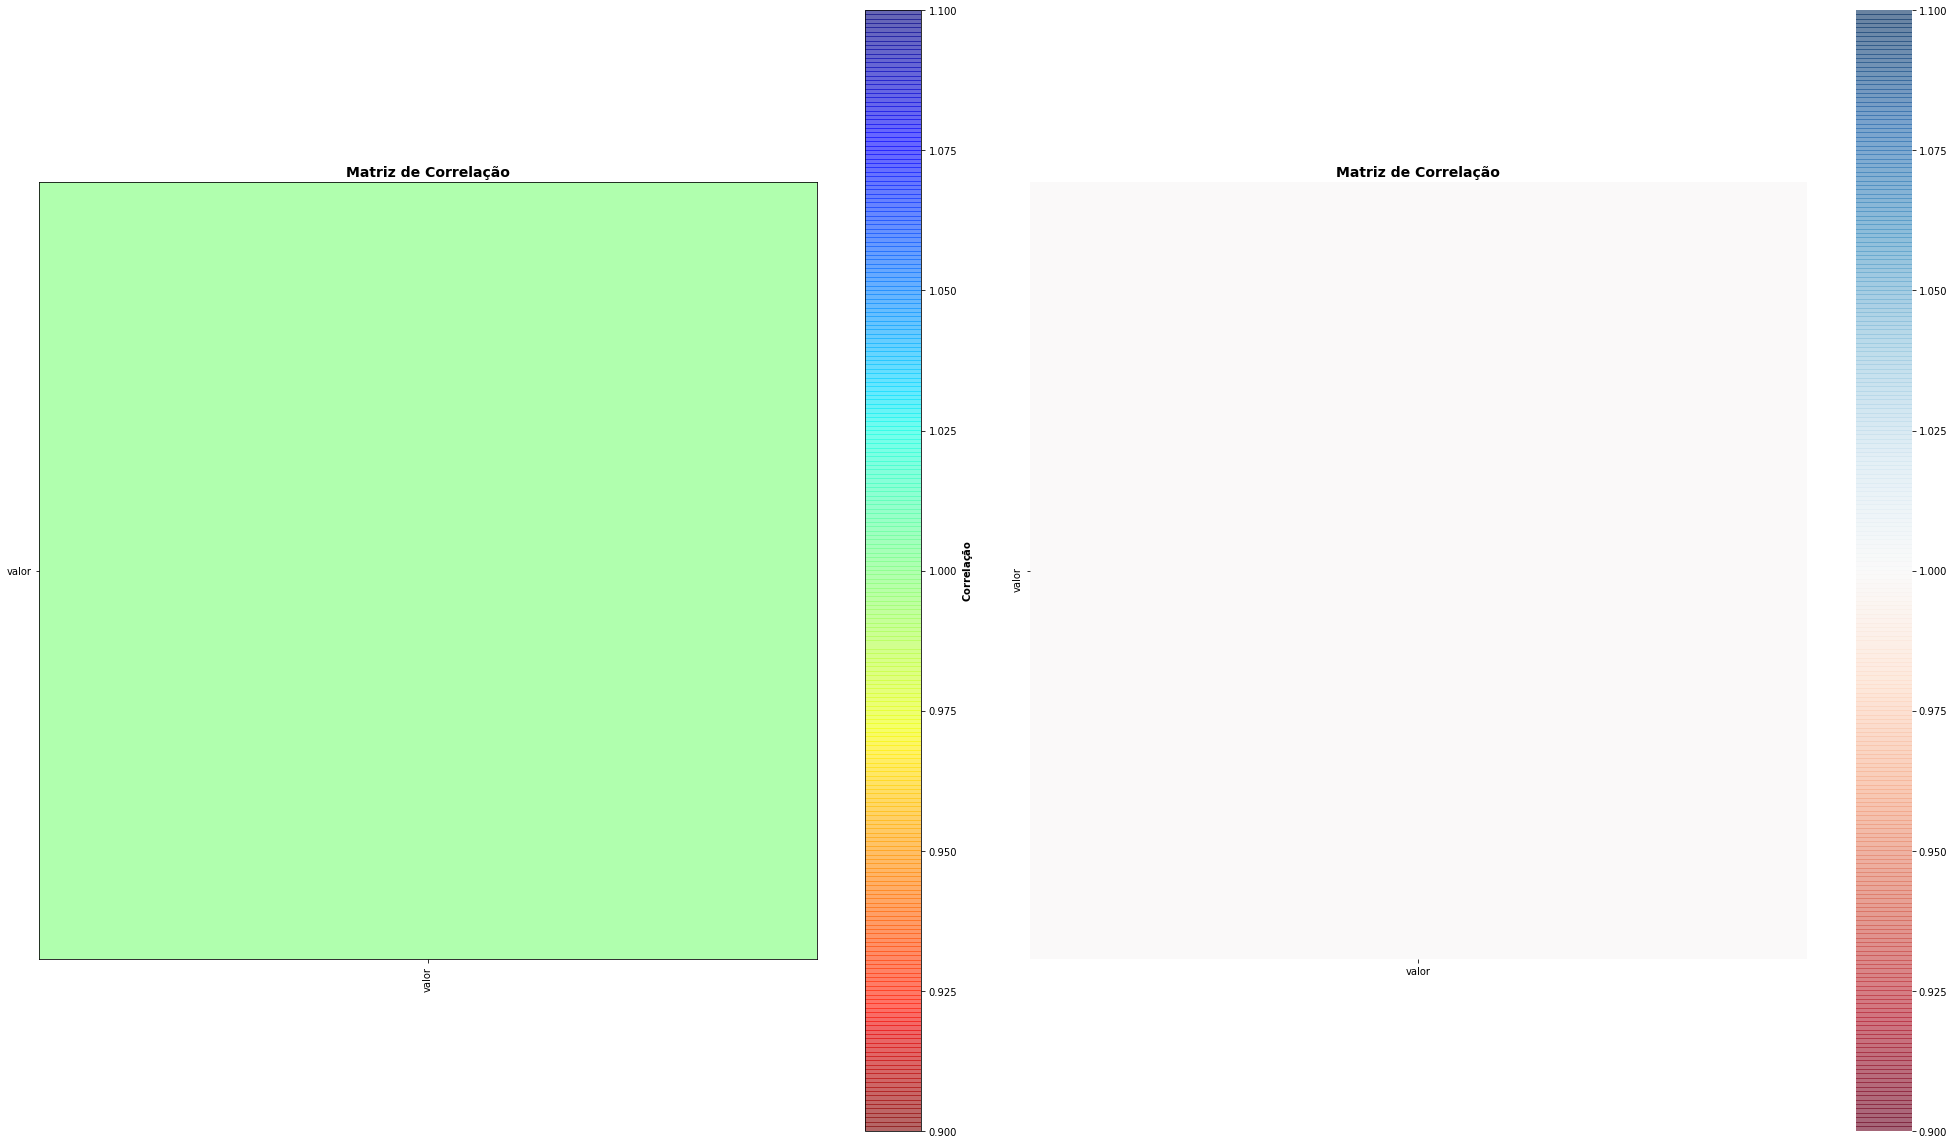

In [ ]:
plt.figure(figsize=(28,16))


matriz = df_concat[[	'country',		'valor', ]].corr()

plt.subplot(1,2,1)
plt.imshow(matriz, cmap='jet_r', alpha=0.6)

plt.xticks(np.arange(len( matriz.columns)), matriz.columns.to_list(), rotation=90)
plt.yticks(np.arange(len( matriz.columns)), matriz.columns.to_list())

cbar = plt.colorbar()
cbar.set_label('$\\bf{Correlação}$')

plt.title('Matriz de Correlação', fontsize=14, weight='bold')

plt.subplot(1,2,2)
sns.heatmap(matriz, cmap='RdBu', square=True, alpha=0.6) 

plt.title('Matriz de Correlação', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()